### Marketing Budget and Actual Sales Dataset

Dataset about Markting Budget in Thousands and Actual Sales in Millions. This dataset can be process using linear regression methods to get predictions about future sales.

Columns that used here are:
marketingbudget(thousands) = represent the budget in thousand of US Dollars actualsales(millions) = represents the sales in millions

https://www.kaggle.com/datasets/jacouchs/marketing-budget-and-actual-sales-dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importamos dataset

In [6]:
sales =  pd.read_csv('C:\desarrollo\proyectos\datasets\sales_dataset.csv')

sales.head(5)

,marketing_budget(thousands),actual_sales(millions)
0,187.86,12.14
1,138.13,12.33
2,177.89,8.41
3,181.13,8.90
4,151.50,12.57


In [12]:
print(sales.shape)
sales.describe()

(222, 2)


,marketing_budget(thousands),actual_sales(millions)
count,222.000000,222.000000
mean,257.992883,16.083198
std,78.439312,4.638950
min,101.910000,8.010000
25%,189.585000,12.445000
50%,262.485000,15.560000
75%,327.787500,19.310000
max,396.880000,25.980000


Agregamos una columna más para ver en promedio cuanto representa en porcentaje . Para esto debemos llevar todo a las mismas unidades (elejimos millones)

In [74]:
sales['%_sobre_ventas'] = ((sales['marketing_budget(thousands)']/ 100) / sales['actual_sales(millions)'] * 100).round(2)

sales.head(40)

,marketing_budget(thousands),actual_sales(millions),%_sobre_ventas
0,187.86,12.14,15.47
1,138.13,12.33,11.20
2,177.89,8.41,21.15
3,181.13,8.90,20.35
4,151.50,12.57,12.05
5,106.87,11.30,9.46
6,160.94,11.66,13.80
7,140.09,10.93,12.82
8,132.58,11.99,11.06
9,127.19,9.44,13.47


Ploteamos con seaborns


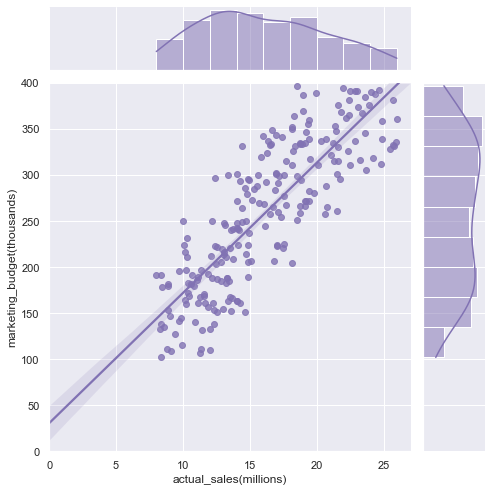

In [14]:
import seaborn as sns
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="actual_sales(millions)", y="marketing_budget(thousands)", data=sales,
                  kind="reg", truncate=False,
                  xlim=(0,27), ylim=(0, 400),
                  color="m", height=7)

### Analizamos la distribucion de los % sobre ventas

Obtenemos que el bugget es en promedio un 16% y que la distribucion se aproxima a una distr. Normal

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    222.000000
mean      16.173423
std        2.971890
min        9.110000
25%       13.955000
50%       16.195000
75%       17.860000
max       24.900000
Name: %_sobre_ventas, dtype: float64


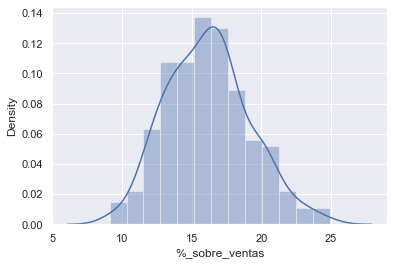

In [45]:
sns.distplot( a=sales['%_sobre_ventas'], hist=True, kde=True, rug=False )

print(sales.describe()['%_sobre_ventas'])

Ahora vamos a intentar pronosticar en funcion de los datos cual sería el presupuesto ideal dado el valor de las ventas actuales

In [51]:
from sklearn.linear_model import LinearRegression

In [53]:
X = sales['actual_sales(millions)'].values.reshape(-1,1)
y = sales['marketing_budget(thousands)']

model = LinearRegression()

model.fit(X,y)



LinearRegression()

In [62]:
print(f'La función para predecir será: \n Budget a Predecir =  {model.coef_.round(2)} * Ventas totales + {model.intercept_.round(2)}')

La función para predecir será: 
 Budget a Predecir =  [14.15] * Ventas totales + 30.45


##### Chequeo con un valor de referencia en el index 22

In [83]:

print(sales[sales.index == 22])

pred = model.coef_.round(2) * 13.06 + model.intercept_.round(2)


    marketing_budget(thousands)  actual_sales(millions)  %_sobre_ventas
22                       213.65                   13.06           16.36
Predicción = [215.249] 
 Residuo = [1.599]


In [93]:
from sklearn.metrics import r2_score

y_true = sales['marketing_budget(thousands)']
y_pred = model.predict(X)

R2 = r2_score(y_true, y_pred).round(4)

R2

#El modelo tiene un ajuste de 0.7

0.7001